In [39]:
%reload_ext autoreload
%autoreload 2

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oolli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oolli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oolli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oolli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In this part we will analyse the time bias in the ratings, how the time influence the final ratings of beer. We see the evolution through the years but also the difference at some special period, specifically the Christmas and new year period and the Oktober fest period.

## Influence of time on the ratings

In [40]:
from src.data.time_bias import *

# Load the data and do some preprocessing, cleaning and add time columns
time_df_rateBeer, time_df_beerAdvocate = load_time_bias_data('data')

First we look at different style of beer and how they evolve through the years. We start by looking only on the rateBeer dataset, to reduce redundant plot, as both are he same for these plot.

In [41]:
# Analysis using time and rating per beer style
time_df_rateBeer_style = time_df_rateBeer.copy()
# Take randomly (following a seed) 10 type of style
time_df_rateBeer_style = time_df_rateBeer_style[time_df_rateBeer_style['style'].isin(time_df_rateBeer_style['style'].sample(10, random_state=1))]
time_df_rateBeer_style = time_df_rateBeer_style.groupby(['style', 'year', 'month'])['rating'].agg(['mean', 'count'])

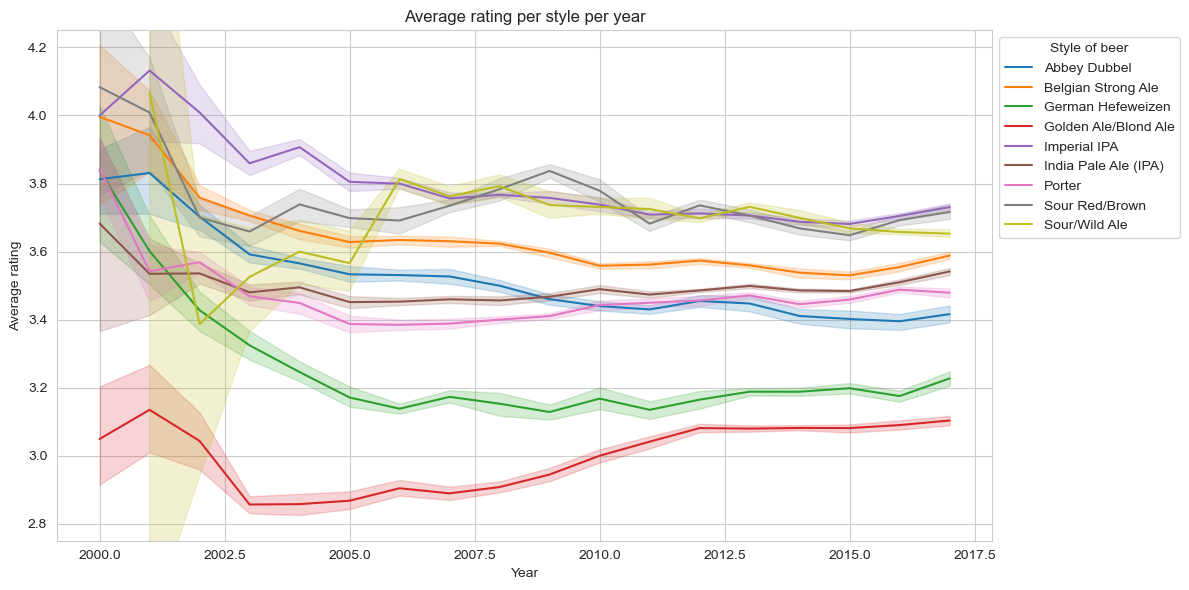

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot the average rating per style and year
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_df_rateBeer_style, x='year', y='mean', hue='style')

plt.xlabel('Year')
plt.ylabel('Average rating')
plt.title('Average rating per style per year')
plt.legend(title='Style of beer', bbox_to_anchor=(1, 1), loc='upper left')
plt.ylim(2.75, 4.25)
plt.tight_layout()

They all start with a high variance in the ratings, but as the years go by, the ratings tend to converge to a certain value. The high rated seams to go down, and the low rated seams to go up. globally they are quite stable. Let's test some more style to confirm.

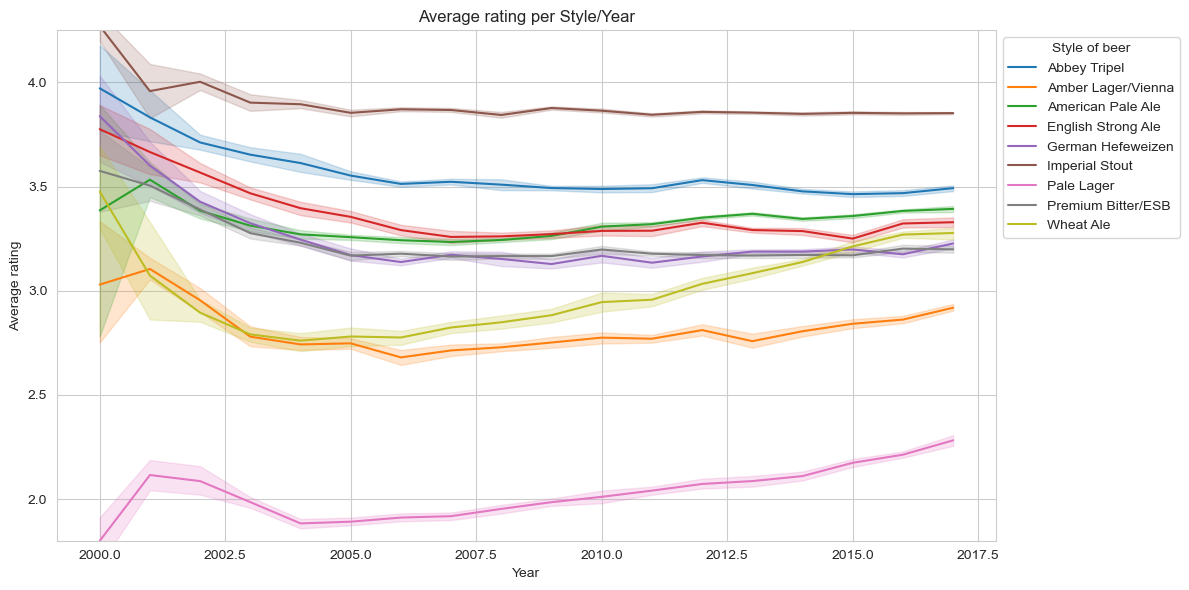

In [43]:
# Take randomly (following a seed) 10 type of style
time_df_rateBeer_style = time_df_rateBeer.copy()
time_df_rateBeer_style = time_df_rateBeer_style[time_df_rateBeer_style['style'].isin(time_df_rateBeer_style['style'].sample(10, random_state=2))]
time_df_rateBeer_style = time_df_rateBeer_style.groupby(['style', 'year', 'month'])['rating'].agg(['mean', 'count'])

# plot the average rating per style and year
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_df_rateBeer_style, x='year', y='mean', hue='style')

plt.xlabel('Year')
plt.ylabel('Average rating')
plt.title('Average rating per Style/Year')
plt.legend(title='Style of beer', bbox_to_anchor=(1, 1), loc='upper left')
plt.ylim(1.8, 4.25)
plt.tight_layout()

In [44]:
# compute the mean rating for the years 2016 and 2017
rateBeer_end = time_df_rateBeer[time_df_rateBeer['year'].isin([2016, 2017])]
# Calculate the global mean rating for those years
global_mean_end = rateBeer_end['rating'].mean()
print(f"Global mean rating for the last years: {global_mean_end}")

Global mean rating for the last years: 3.412139683797763


We see that the second sample of style follow the same rule as the first one. The ratings tend to converge to a certain value. The high rated seams to go down, and the low rated seams to go up. We will try to explain this with more researches. We note that the global rating for all beer for the last two years is 3.41.

Here we will see what and how much the year the month and the day affect the rating for both dataset.

In [45]:
# Do a logistic regression analysis to identify factors affecting ratings
regression_analysis(time_df_rateBeer)

Optimization terminated successfully.
         Current function value: 0.668482
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:          binary_rating   No. Observations:              6117679
Model:                          Logit   Df Residuals:                  6117675
Method:                           MLE   Df Model:                            3
Date:                Fri, 20 Dec 2024   Pseudo R-squ.:                0.008102
Time:                        20:08:09   Log-Likelihood:            -4.0896e+06
converged:                       True   LL-Null:                   -4.1230e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -110.0059      0.431   -255.329      0.000    -110.850    -109.162
year           0.0549      0.

In [46]:
# Do a logistic regression analysis to identify factors affecting ratings
regression_analysis(time_df_beerAdvocate)

Optimization terminated successfully.
         Current function value: 0.677492
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:          binary_rating   No. Observations:              2199798
Model:                          Logit   Df Residuals:                  2199794
Method:                           MLE   Df Model:                            3
Date:                Fri, 20 Dec 2024   Pseudo R-squ.:                0.004022
Time:                        20:08:14   Log-Likelihood:            -1.4903e+06
converged:                       True   LL-Null:                   -1.4964e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -85.7804      0.801   -107.147      0.000     -87.350     -84.211
year           0.0428      0.

We can see for both dataset that the year has a significant impact on the rating, the month and the day have a less significant impact. With little more impact on the RateBeer dataset.

Now we will compare the average rating per year for all beer and see there evolution as we know the year affect much. We add an error bar using the standard deviation. We test this for both dataset to see the difference. We also look at how many rating have been given for each year.

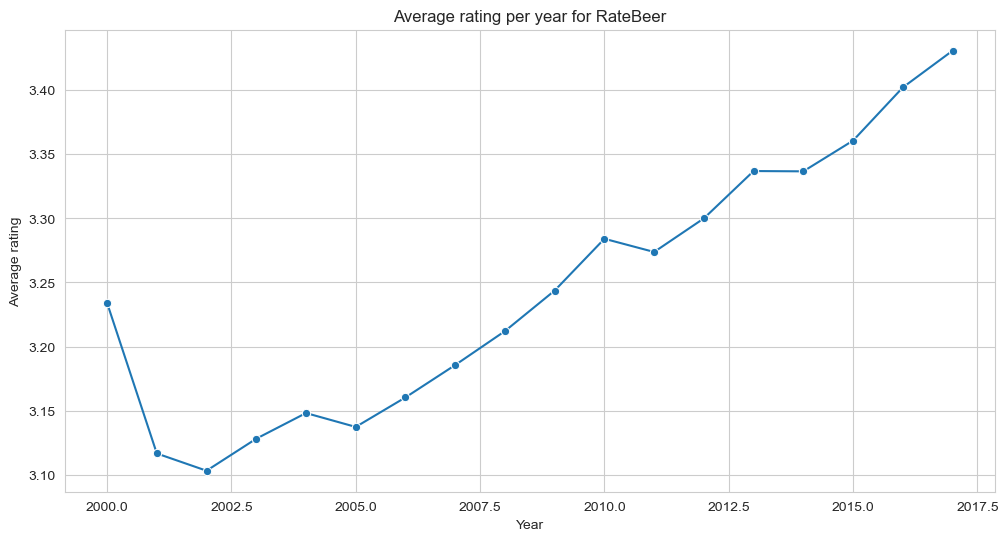

In [47]:
# Compare the average rating per year for all beer for the RateBeer dataset
mean = time_df_rateBeer.groupby('year')['rating'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=mean, x='year', y='rating', marker='o')

plt.xlabel('Year')
plt.ylabel('Average rating')
plt.title('Average rating per year for RateBeer')
plt.show()

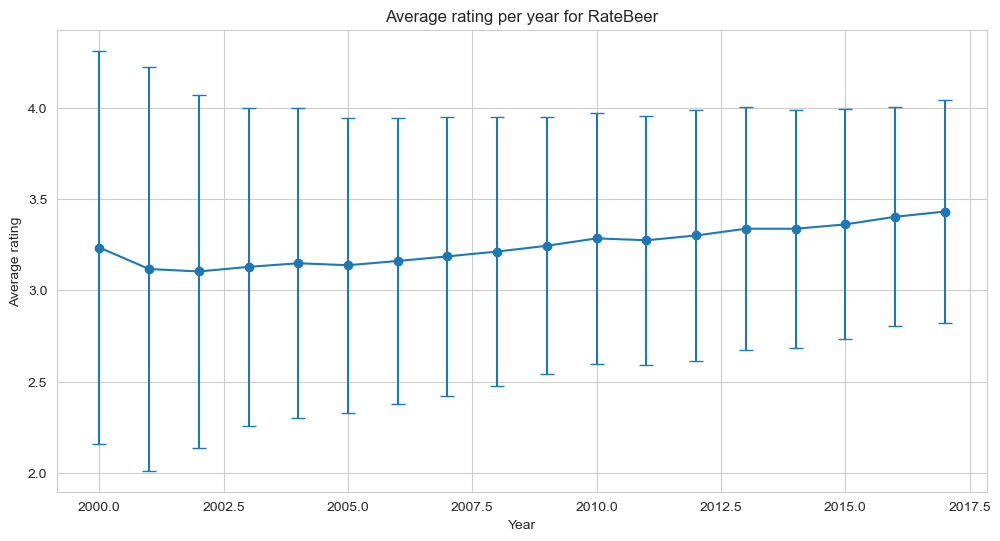

In [48]:
# Compare the average rating per year for all beer with std for the RateBeer dataset
mean = time_df_rateBeer.groupby('year')['rating'].mean().reset_index()
# Add the standard deviation to the plot
std = time_df_rateBeer.groupby('year')['rating'].std().reset_index()
plt.figure(figsize=(12, 6))
plt.errorbar(mean['year'], mean['rating'], yerr=std['rating'], capsize=5, marker='o')

plt.xlabel('Year')
plt.ylabel('Average rating')
plt.title('Average rating per year for RateBeer')
plt.show()

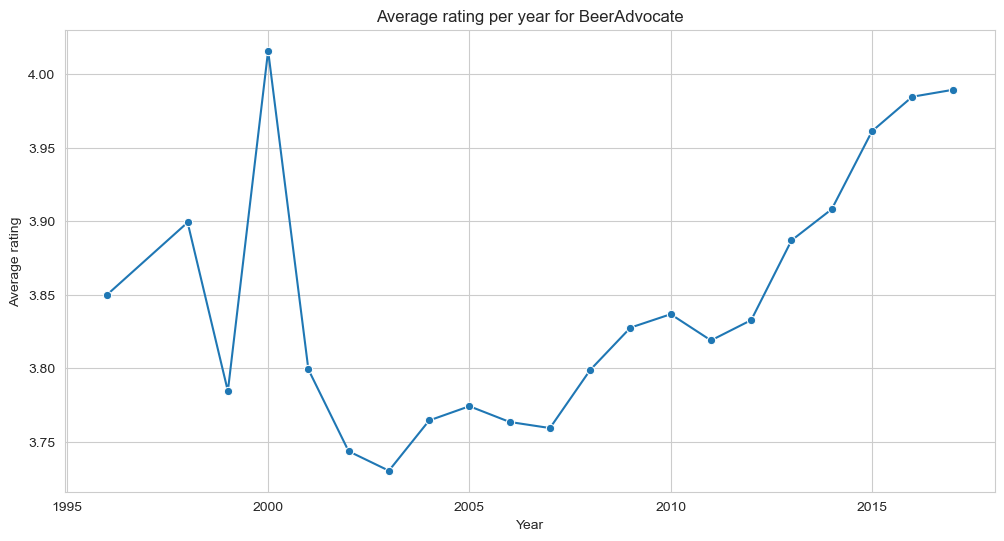

In [49]:
# Compare the average rating per year for all beer for the BeerAdvocate dataset
mean = time_df_beerAdvocate.groupby('year')['rating'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=mean, x='year', y='rating', marker='o')

plt.xlabel('Year')
plt.ylabel('Average rating')
plt.title('Average rating per year for BeerAdvocate')
plt.show()

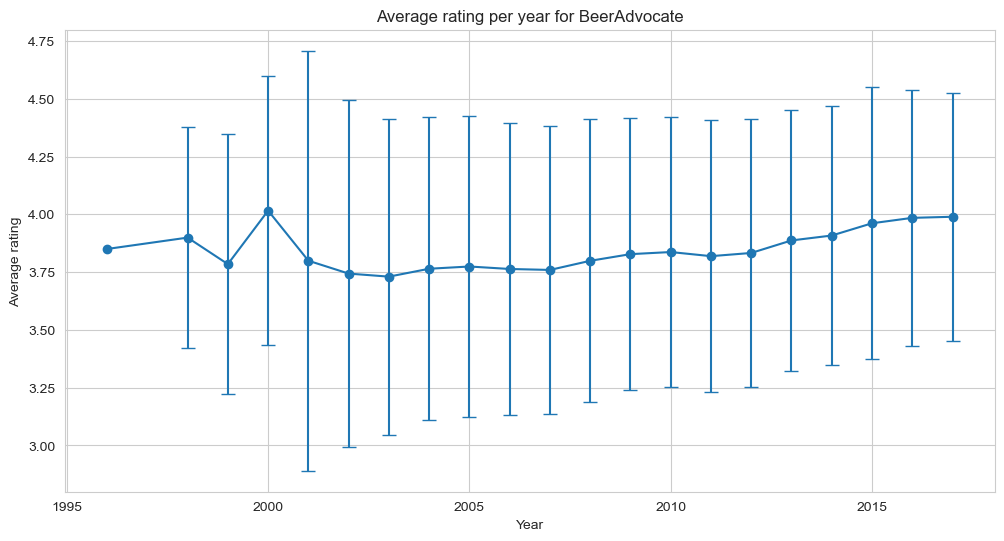

In [50]:
# Compare the average rating per year for all beer with std for the BeerAdvocate dataset
mean = time_df_beerAdvocate.groupby('year')['rating'].mean().reset_index()
# Add the standard deviation to the plot
std = time_df_beerAdvocate.groupby('year')['rating'].std().reset_index()
plt.figure(figsize=(12, 6))
plt.errorbar(mean['year'], mean['rating'], yerr=std['rating'], capsize=5, marker='o')

plt.xlabel('Year')
plt.ylabel('Average rating')
plt.title('Average rating per year for BeerAdvocate')
plt.show()

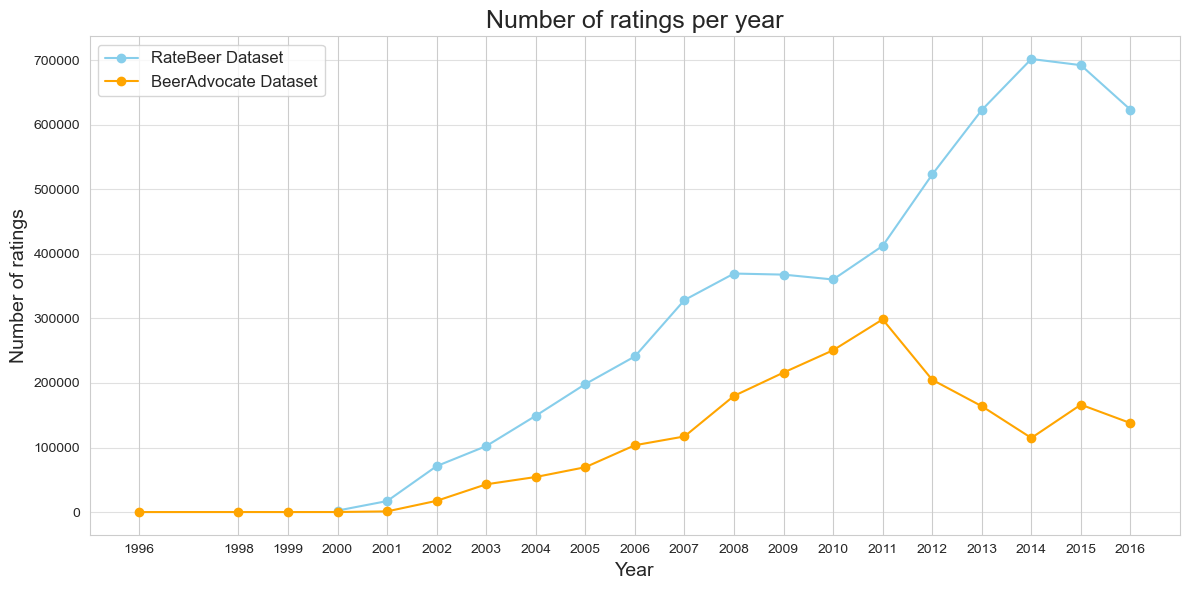

In [51]:
# Group by year and count the number of ratings for each dataset
ratings_rateBeer = time_df_rateBeer.groupby('year')['rating'].count().reset_index()
ratings_beerAdvocate = time_df_beerAdvocate.groupby('year')['rating'].count().reset_index()
# Discard year 2017 as the year is not complete
ratings_rateBeer = ratings_rateBeer[ratings_rateBeer['year'] != 2017].reset_index()
ratings_beerAdvocate = ratings_beerAdvocate[ratings_beerAdvocate['year'] != 2017].reset_index()

# Plot the data
plt.figure(figsize=(12, 6))

# Reviews dataset
plt.plot(ratings_rateBeer['year'], ratings_rateBeer['rating'], label='RateBeer Dataset', marker='o', color='skyblue')
# BeerAdvocate dataset
plt.plot(ratings_beerAdvocate['year'], ratings_beerAdvocate['rating'], label='BeerAdvocate Dataset', marker='o', color='orange')

plt.title('Number of ratings per year', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of ratings', fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', alpha=0.6)
plt.xticks(ratings_beerAdvocate['year'])
plt.tight_layout()

# Show plot
plt.show()

The first year are not determinant as the number of review are very low, we will only focus on the data from 2001 for RateBeer and 2002 for BeerAdvocate. In these 5 plot we can see the that for both datasets the average ratings goes up through the year, from 3.10 to 3.43 for RateBeer and 3.74 to 3.98 for beerAdvocate. The standard deviation goes down for both. We also see a big increase in the number of review through the year, with a downfall for BeerAdvocate from 2011. This mean the rating for the beer are growing more similar threw the time, and a little better. This can be explained by different bias that we look into in this research.

To deepen ours analysis on the time bias, we will compare the ratings during the Christmas and new year period and the Oktoberfest period with the rest of the year to see if there is a difference. These two moment are holidays were people goes out much and drink lots of beer.

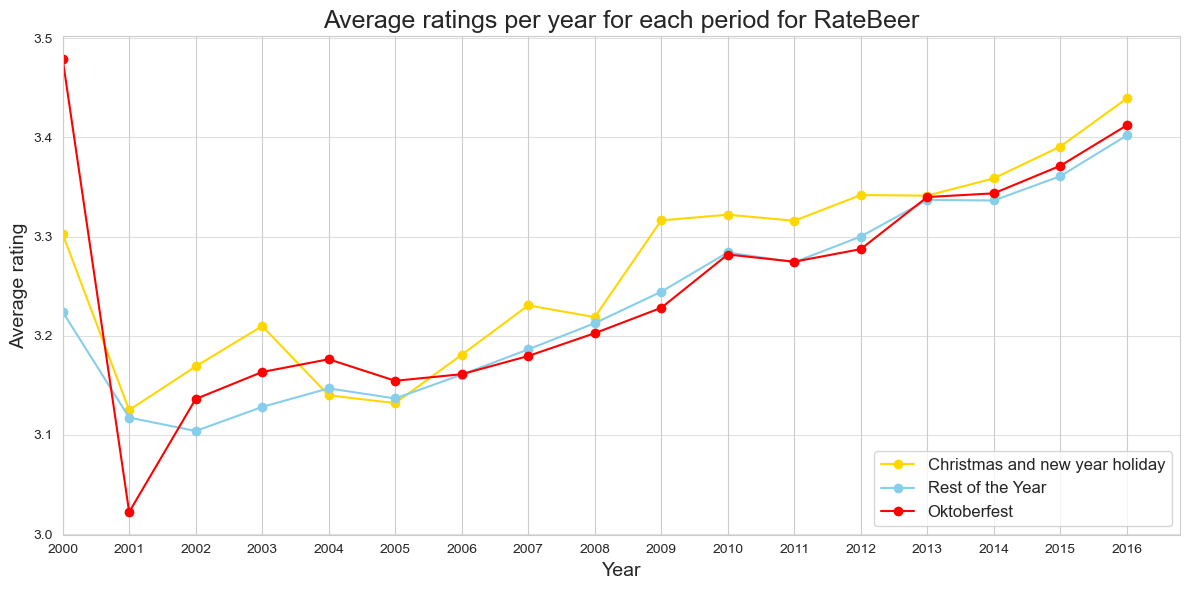

In [56]:
time_period_rating(time_df_rateBeer)
plt.title('Average ratings per year for each period for RateBeer', fontsize=18)
plt.tight_layout()

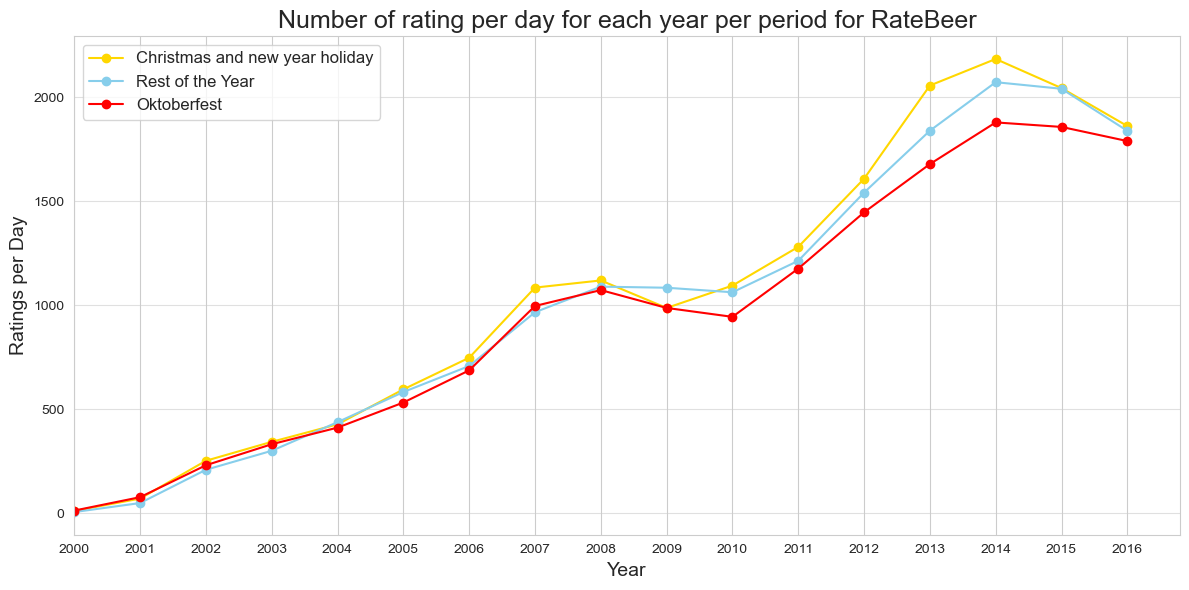

In [57]:
time_period_per_day(time_df_rateBeer)
plt.title('Number of rating per day for each year per period for RateBeer', fontsize=18)
plt.tight_layout()

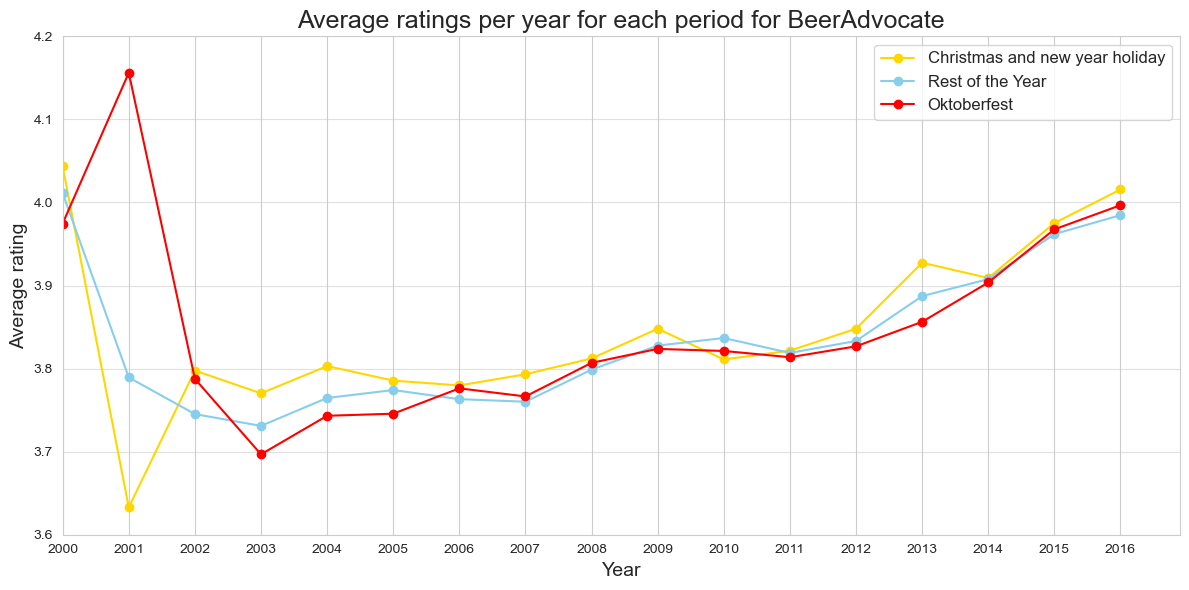

In [58]:
time_period_rating(time_df_beerAdvocate)
plt.title('Average ratings per year for each period for BeerAdvocate', fontsize=18)
plt.ylim(3.6, 4.2)
plt.tight_layout()

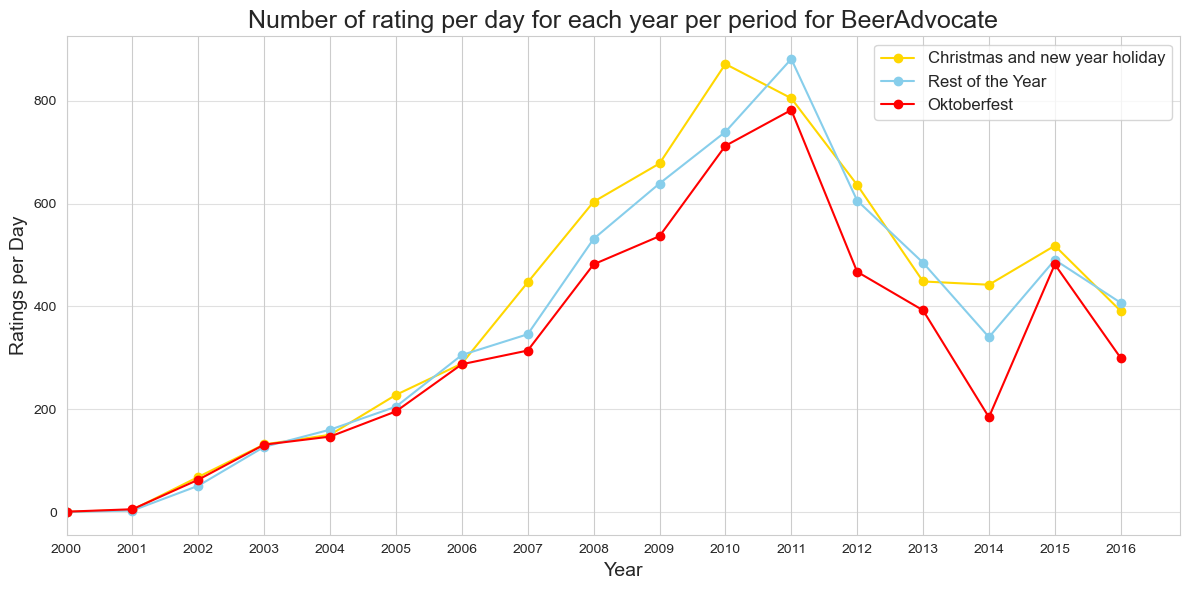

In [59]:
time_period_per_day(time_df_beerAdvocate)
plt.title('Number of rating per day for each year per period for BeerAdvocate', fontsize=18)
plt.tight_layout()

We see that on both dataset, the holidays rating are a little higher and there are more rating done, this could be because there a more people drinking and having time to review, and in a better environment this make them give slightly better result. As oppose for the Oktober fest period were it seam to have no influence, the fest are not famous enough in the whole world and only in some country to make a sufficient impact. There seam even that there are less review at that time, it could be a busy period for the people not concerned by the holiday.